In [89]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy import stats
import numpy as np
import calendar
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import linregress
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import warnings


# **Spring 2024 Data Science Project: Analyzing and Predicting Avocado Pricing**

Member 1: Anoushka Arora, Contribution: 95% (didnt contribute to some of G)
Member 2: Neha Rathnavel, Contribution: 90% (didnt contribute to some of F)
Member 3: Aditi Chalasani, Contribution: 90% (didnt contribute to some of C)

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

Authors: Anoushka Arora (May 6, 2024) , Neha Rathnavel (May 6, 2024), Aditi Chalasani (May 6, 2024)

Member Summary Contribution of Anoushka Arora, Neha Rathnavel, and Aditi Chalasani:
All three of us collaborated together to search through various datasets and choose a project idea. We also sat together and worked collaboratively for the preprocessing and curation of our data. Anoushka and Neha split the work for the Data Exploration and Summary Statistics section. All three of us split the work for sections D,E,F. We had two machine learning models and split the work for design/development and training between us. Then we sat together, reviewed everyone's work, and wrote the conclusions for these ML algorithms collaboratively. We created the final report as we went, each of us adding our individual pieces to the whole so this was completely collaborative as well. Finally, the additional work can be considered as setting up the Github and submission, as we do not have any other additional work, which we also did together.

## **Introduction**

### Why try to predict Avocado prices?

Closely monitoring avocado prices isn't just about guacamole—it's a window into national economics. As demand for avocados skyrockets, predicting price fluctuations becomes crucial for farmers, retailers, and consumers alike. By understanding and forecasting factors about avocados, businesses can make informed decisions, optimize supply chains, and manage risks effectively. It's not just about the fruit—it's about the pulse of the economy.

In this tutorial, we hope to gain the following insights and answer the following questions.
1.   What factors impact avocado pricing and consumption? Is it region? Is it type?
2.   What machine learning models would best allow us to gain insight into the future of avocados?

### Gathering Data

We gathered our data from a source that compiled information from the Hass Avocado Board, which an organization invested in providing the industry with supply and market data. Our data ranges from years 2015 to 2023, and accounts for the following variables:

*   Average Price
*   Type
*   Total Volume
*   Total Bags
*   Small Bags
*   Large Bags
*   Extra Large Bags
*   Region
*   Avocado Size

We downloaded this data from [Kaggle](https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023), obtaining a csv which accounted for the following variables over the previously stated time frame

We then used Pandas to store this data into a dataframe. There were a signifigant number of null values for the columns showing the consumed volume of specific sized bags (small, large, etc. ), so we decided to drop those columns entirely from our analysis.

In [90]:
act = pd.read_csv('/content/avocado.csv')
act.isnull().sum()

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

In [91]:
act = act.drop(columns=['SmallBags', 'LargeBags', 'XLargeBags'])

Additionally, when looking at the unique location values for the 'region' column, we noticed that there were a lot of overlapping locations and some that spanned either very broad or very small spans of distance. Therefore, we wanted to relabel the datapoints so that they all fell under some broad region of the U.S so the data would be easier to analyze. This was accomplished through mapping and creating a seperate column labeled 'broad_region'.

In [92]:
act['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'Miami', 'Midsouth',
       'Nashville', 'NewOrleans', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego',
       'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral',
       'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS',
       'West', 'WestTexNewMexico', 'BirminghamMontgomery',
       'PeoriaSpringfield', 'Providence', 'Toledo', 'Wichita',
       'MiamiFtLauderdale'], dtype=object)

In [93]:
region_mapping = {
    'Albany': 'Northeast',
    'Atlanta': 'Southeast',
    'BaltimoreWashington': 'Northeast',
    'Boise': 'West',
    'Boston': 'Northeast',
    'BuffaloRochester': 'Northeast',
    'California': 'West',
    'Charlotte': 'Southeast',
    'Chicago': 'GreatLakes',
    'CincinnatiDayton': 'GreatLakes',
    'Columbus': 'GreatLakes',
    'DallasFtWorth': 'SouthCentral',
    'Denver': 'Plains',
    'Detroit': 'GreatLakes',
    'GrandRapids': 'GreatLakes',
    'GreatLakes': 'GreatLakes',
    'HarrisburgScranton': 'Northeast',
    'HartfordSpringfield': 'Northeast',
    'Houston': 'SouthCentral',
    'Indianapolis': 'GreatLakes',
    'Jacksonville': 'Southeast',
    'LasVegas': 'West',
    'LosAngeles': 'West',
    'Louisville': 'GreatLakes',
    'Miami': 'Southeast',
    'Midsouth': 'SouthCentral',
    'Nashville': 'SouthCentral',
    'NewOrleans': 'SouthCentral',
    'NewYork': 'Northeast',
    'Northeast': 'Northeast',
    'NorthernNewEngland': 'Northeast',
    'Orlando': 'Southeast',
    'Philadelphia': 'Northeast',
    'PhoenixTucson': 'West',
    'Pittsburgh': 'Northeast',
    'Plains': 'Plains',
    'Portland': 'West',
    'RaleighGreensboro': 'Southeast',
    'RichmondNorfolk': 'Southeast',
    'Roanoke': 'Southeast',
    'Sacramento': 'West',
    'SanDiego': 'West',
    'SanFrancisco': 'West',
    'Seattle': 'West',
    'SouthCarolina': 'Southeast',
    'SouthCentral': 'SouthCentral',
    'Southeast': 'Southeast',
    'Spokane': 'West',
    'StLouis': 'GreatLakes',
    'Syracuse': 'Northeast',
    'Tampa': 'Southeast',
    'TotalUS': 'TotalUS',
    'West': 'West',
    'WestTexNewMexico': 'West',
    'BirminghamMontgomery': 'Southeast',
    'PeoriaSpringfield': 'GreatLakes',
    'Providence': 'Northeast',
    'Toledo': 'GreatLakes',
    'Wichita': 'Plains',
    'MiamiFtLauderdale': 'Southeast'
}

act['broad_region'] = act['region'].map(region_mapping)
act.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,type,region,broad_region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,conventional,Albany,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,organic,Albany,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,conventional,Atlanta,Southeast
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,organic,Atlanta,Southeast
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,conventional,BaltimoreWashington,Northeast


## Exploratory Data Analysis

To start off, we wanted to explore how total avocado consumption changed overtime. We plotted the yearly differences in total avocado consumption, seperated over the months to account for potential seasonal differences in consumption.

<Figure size 1500x600 with 0 Axes>

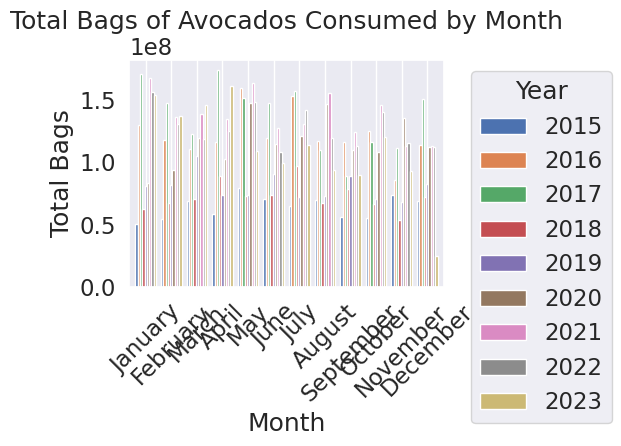

In [94]:
df = act
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

monthly_bags = df.groupby(['Year', 'Month'])['TotalBags'].sum().reset_index()
monthly_bags_pivot = monthly_bags.pivot(index='Month', columns='Year', values='TotalBags')
monthly_bags_pivot.index = monthly_bags_pivot.index.map(lambda x: calendar.month_name[x])

plt.figure(figsize=(15, 6))
monthly_bags_pivot.plot(kind='bar', width=0.8)
plt.title('Total Bags of Avocados Consumed by Month')
plt.xlabel('Month')
plt.ylabel('Total Bags')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Conclusion**: From the chart, we can see that avocado consumption generally sees a stark increase between 2015 to 2017. However, most months see a fall in avocado consumption during 2018 and then continue to rise steadily during the years after that. Although there is no observable trend in the increase/decrease of avocado consumption throughout the years, we did notice that 2017 experienced the highest consumption of avocados for 6/12 months of the year, often with huge spikes compared to 2016. This lead us to wonder if the consumption of avocados statistically differed in 2017 compared to other years.

## Comparing the average prices of avocados across the years

In order to conduct further analysis, we wanted to see if the price data of this data set appeared to be normally distributed when seperated by year. We also seperated this data by avocado type to account for any differences in that regard.

**Conventional Avocado Prices:**

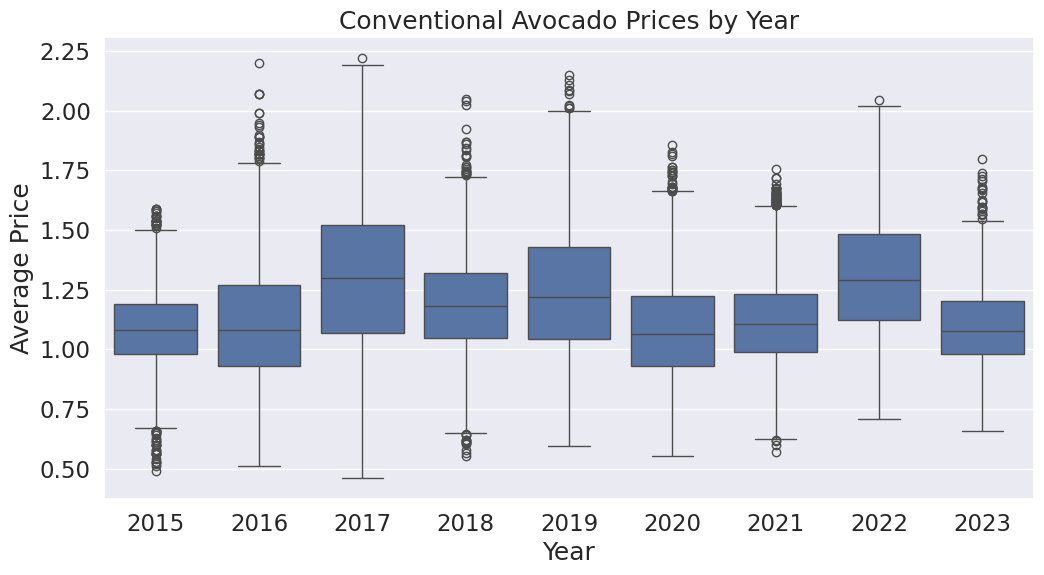

In [95]:
df = act
df = df[df['type'] == 'conventional']
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year', y='AveragePrice')
plt.title('Conventional Avocado Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

**Organic Avocado Prices:**

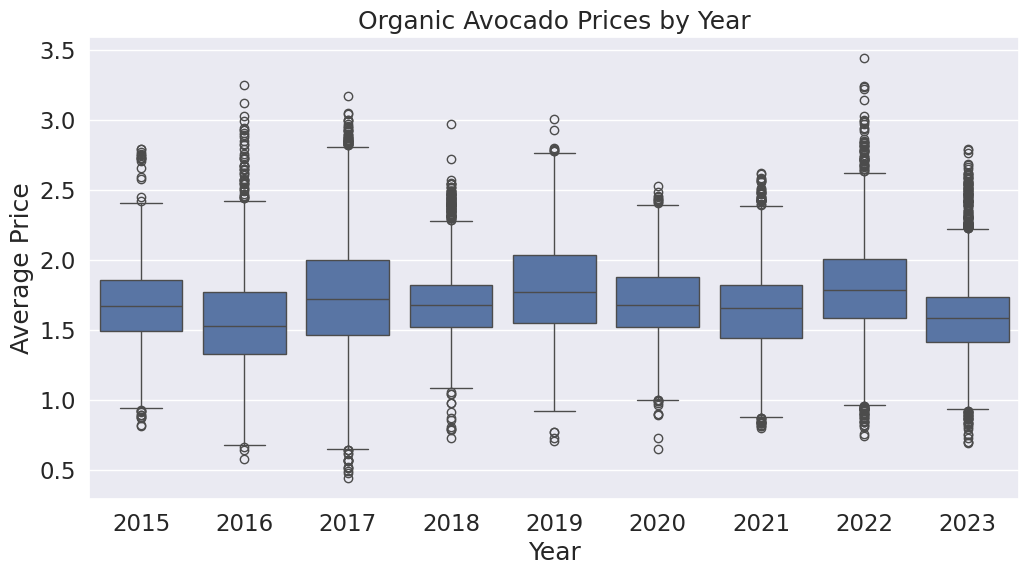

In [96]:
df = act
df = df[df['type'] == 'organic']
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year', y='AveragePrice')
plt.title('Organic Avocado Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

Because this data is normally distributed, we were able to use an ANOVA test to see if their was a signifigant difference amongst avocado prices across the years. We conducted two ANOVA tests, which calculated the difference amongst organic and conventional avocado prices.

### Hypothesis Test 1: Comparing the differences amongst organic avoocado prices
α level: 0.05

Null Hypothesis: There is no statistically signifigant difference between the average price of organic avocados between years

Alternative Hypothesis: There is a statistically signifigant difference between the average price of organic avocados between years

In [97]:
df = act
df = df[df['type'] == 'organic']

grouped_data = [df[df['Year'] == year]['AveragePrice'] for year in df['Year'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 172.77139519850934
P-value: 1.130603318576927e-285


**Conclusion:** Because the p-value is less than our signifigance value of 0.05, the null hypothesis can be rejected. There is sufficient evidence to suggest that there is a significant difference between organic avocado prices when compared by year. We have also obtained a high F-statistic value of approximately 172.77 which means that the variability of the group means is high relative to the variability within each group-further supporting our rejection of the null hypothesis.

### Hypothesis Test 2: Comparing the differences amongst conventional avocado prices between years

α level: 0.05

Null Hypothesis: There is no statistically signifigant difference between the average price of conventional avocados between years

Alternative Hypothesis: There is a statistically signifigant difference between the average price of conventional avocados between years


In [98]:
df = act
df = df[df['type'] == 'conventional']

grouped_data = [df[df['Year'] == year]['AveragePrice'] for year in df['Year'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 460.94662651222586
P-value: 0.0


**Conclusion:** Because the p-value is less than our signifigance value of 0.05, the null hypothesis can be rejected and have sufficient evidence to suggest that there is a significant difference between conventional avocado prices when compared by year. Also, we have also obtained a high F-statistic value of approximately 460.95 which means that the variability of the group means is high relative to the variability within each group-further supporting our rejection of the null hypothesis.

Because our ANOVA indicated that there was a signifigant difference across average prices when comparing across years, we performed a post-hoc analysis to see which years in particular differed. The post-hoc test we chose to do was a Tukey's Honestly Significant Difference (HSD) test.

In [99]:
df = act
data = {'Year': df['Year'], 'AveragePrice': df['AveragePrice']}
df_anova = pd.DataFrame(data)

tukey_results = pairwise_tukeyhsd(df_anova['AveragePrice'], df_anova['Year'])
tukey_summary = tukey_results.summary()
print(tukey_summary)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2015   2016   -0.037    0.0 -0.0595 -0.0144   True
  2015   2017   0.1395    0.0  0.1171   0.162   True
  2015   2018   0.0609    0.0  0.0388   0.083   True
  2015   2019   0.1478    0.0  0.1257  0.1699   True
  2015   2020    0.017 0.2907 -0.0051  0.0391  False
  2015   2021   0.0035 0.9999 -0.0186  0.0256  False
  2015   2022   0.1689    0.0  0.1468   0.191   True
  2015   2023  -0.0322 0.0003 -0.0547 -0.0098   True
  2016   2017   0.1765    0.0   0.154   0.199   True
  2016   2018   0.0979    0.0  0.0758    0.12   True
  2016   2019   0.1848    0.0  0.1627  0.2069   True
  2016   2020    0.054    0.0  0.0319  0.0761   True
  2016   2021   0.0405    0.0  0.0184  0.0626   True
  2016   2022   0.2059    0.0  0.1838   0.228   True
  2016   2023   0.0047 0.9993 -0.0177  0.0271  False
  2017   2018  -0.0786    0.0 -0.1006 -0.0566 

From the results of this test, it is clear that the means for most years differ from each other. The only years which didn't have signifigant difference in means are the following—(2015, 2020), (2020, 2023), (2017, 2022), (2016, 2023), (2016, 2021), (2016, 2020), (2015, 2023), (2015, 2020)

## Avocado Prices Across Regions


To determine which tests we were going to use to compare the means of avocado prices across regions, we decided to create boxplots of each respective region to gauge if the distribution was normal.

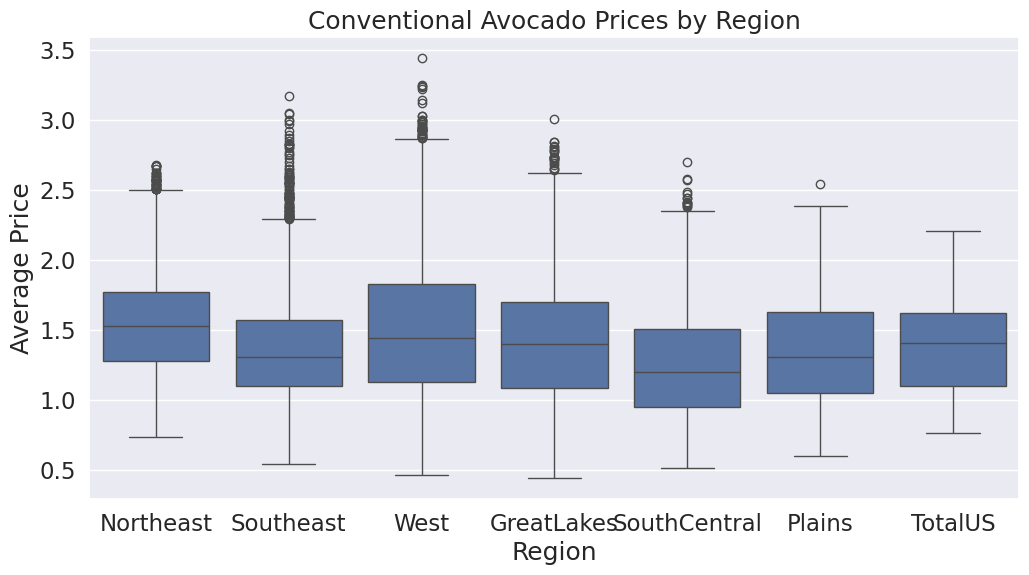

In [100]:
df = act
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='broad_region', y='AveragePrice')
plt.title('Conventional Avocado Prices by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()

### Hypothesis Test: Comparing average price across regions

Visually, it is clear that all the regions' average price tend to skew more towards the bottom, so it wouldn't be appropriate to use a hypothesis test which relies on the distributions being normal. As a result, we decided to use a Kruskal-Wallis test to determine if there was a signifigant different between means of the regions.

α level: 0.05

Null Hypothesis: There is no statistically significant difference between the average avocado prices between regions in the US.

Alternative Hypothesis: There is a statistically significant difference between the average avocado prices between regions in the US.

In [101]:
df = act

regions = df['broad_region'].unique()

region_groups = [df[df['broad_region'] == region]['AveragePrice'] for region in regions]

statistic, p_value = stats.kruskal(*region_groups)

print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)
print("")


Kruskal-Wallis statistic: 3251.3128280858423
p-value: 0.0



**Conclusion:** The obtained P-value is a very small value that is less than the established significance less of 0.05. Therefore, we can reject the null hypothesis on the basis that there is sufficient evidence suggesting that there is a significant difference between the average avocado prices between regions in America.  

We decided to conduct a post-hoc test to determine which regions experienced signifigant difference from each other, again choosing to do a Tukey's Honestly Significant Difference (HSD) test.

In [102]:
tukey_results = pairwise_tukeyhsd(df['AveragePrice'], df['broad_region'])

print("Tukey's HSD results:")
print(tukey_results)

Tukey's HSD results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  GreatLakes    Northeast   0.1206    0.0  0.1051   0.136   True
  GreatLakes       Plains  -0.0798    0.0 -0.1051 -0.0545   True
  GreatLakes SouthCentral  -0.1854    0.0 -0.2043 -0.1665   True
  GreatLakes    Southeast  -0.0719    0.0 -0.0876 -0.0562   True
  GreatLakes      TotalUS  -0.0477  0.005 -0.0862 -0.0091   True
  GreatLakes         West   0.0713    0.0   0.056  0.0866   True
   Northeast       Plains  -0.2004    0.0 -0.2252 -0.1756   True
   Northeast SouthCentral  -0.3059    0.0 -0.3242 -0.2877   True
   Northeast    Southeast  -0.1925    0.0 -0.2074 -0.1775   True
   Northeast      TotalUS  -0.1682    0.0 -0.2064   -0.13   True
   Northeast         West  -0.0493    0.0 -0.0638 -0.0347   True
      Plains SouthCentral  -0.1055    0.0 -0.1326 -0.0784   True
    

When looking at these results, its clear that almost every regions' mean differs every other regions' mean, besides a few specific cases (Southeast and TotalUS, Plans and Total US, and Plains and Southeast). Therefore, region seems to play a key factor in determining an avocado's price.

## Correlation Matrix

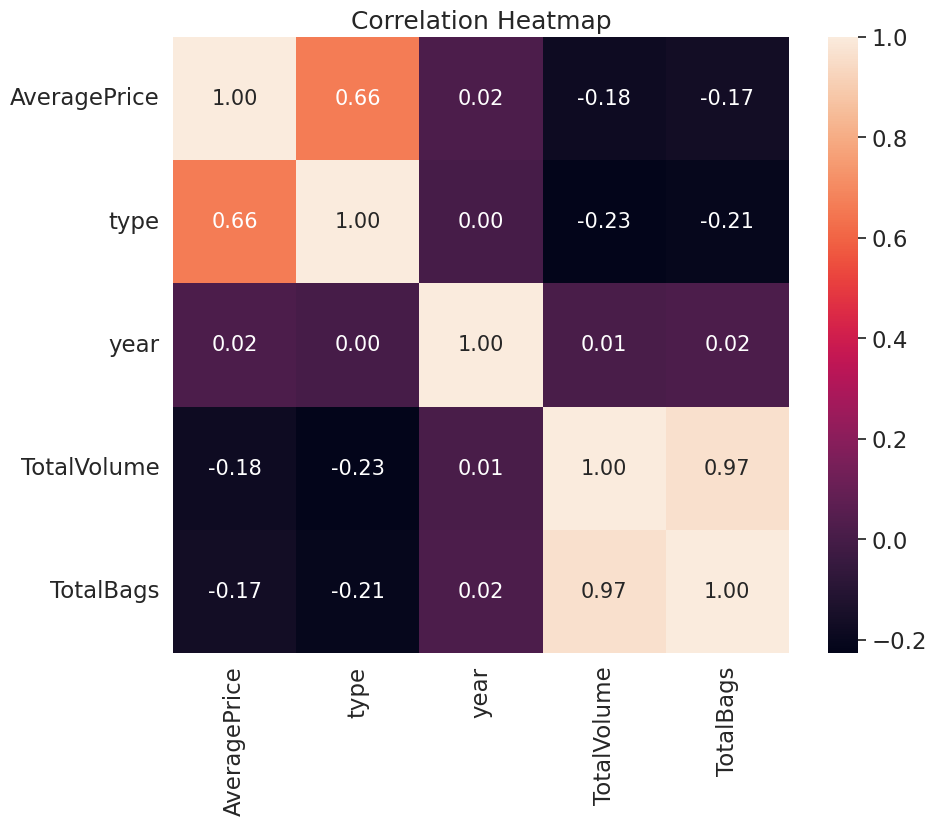

In [103]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
act['type'] = label.fit_transform(act['type'])
act['year'] = act['Date'].dt.year
cols = ['AveragePrice', 'type', 'year', 'TotalVolume', 'TotalBags']
cm = np.corrcoef(act[cols].values.T)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.title('Correlation Heatmap')
plt.show()

From the above correlation matrix, it is clear that type plays a big role in the price of acovados, as well as relatively in the volume of avocados sold. Due to this fact, we also thought it could be interesting to predict avocado type through other variables.

Based off of our exploratory analysis, we have a few questions that are left unanswered. Firstly. we noticed that the correlation between type and averageprice is the highest of all observed so know that type influences price the most. So, we wanted to delve deeper into this connection by training our data using a RandomForestClassifier.

We also want to apply another aspect of machine learning, regression, to our dataset in order to draw further conclusions regarding the relationships observable in this dataset. Specifically, we want to delve into the connection between avocado pricing and time.


## Machine Learning Models

## RandomForestClassifier

The code below predics the type of avocado based on various factors using logistics regression, specifically the random forest classifier.

In [104]:
warnings.filterwarnings('ignore')

x = df.drop(['type','region','Date', 'broad_region'], axis = 1)
y = df.type

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [105]:
logreg =  LogisticRegression(penalty='l2', tol=0.0001).fit(x_train,y_train)
print("LogisticRegression train data score:{:.3f}".
     format(logreg.score(x_train,y_train)))
print("LogisticRegression test data score:{:.3f}".
     format(logreg.score(x_test,y_test)))

LogisticRegression train data score:0.933
LogisticRegression test data score:0.933


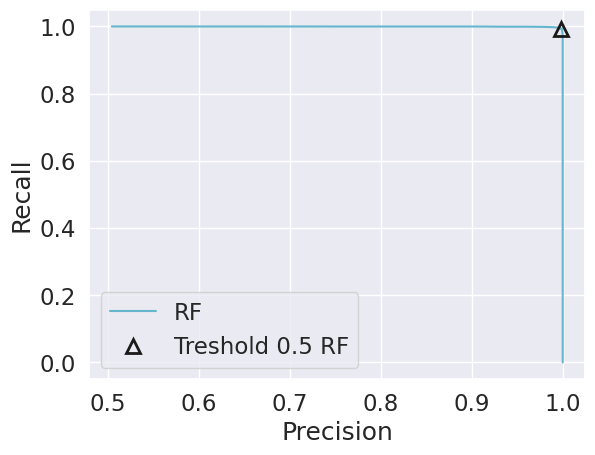

In [106]:
rf =  RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(x_train,y_train)
precision_rf,recall_rf,thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])

plt.plot(precision_rf,recall_rf,label = 'RF', color = 'c')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf],
        recall_rf[close_default_rf],'^',c = 'k', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", mew = 2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

In [107]:
from sklearn.metrics import average_precision_score
p_rf = average_precision_score(y_test,rf.predict_proba(x_test)[:,1])
print("Average precision score Random Forest Classifier: {:.3f}".
     format(p_rf))

Average precision score Random Forest Classifier: 1.000


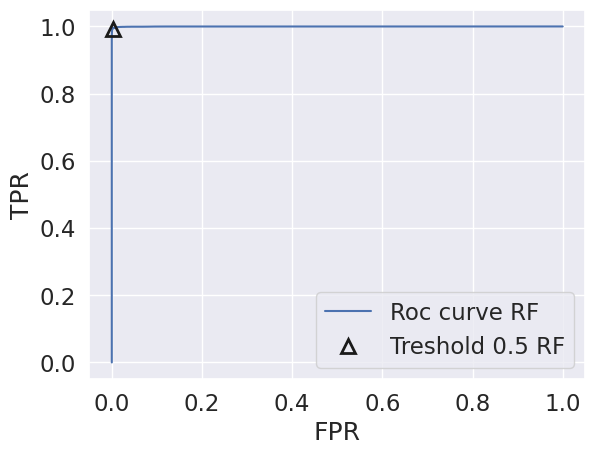

In [108]:
fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.plot(fpr_rf,tpr_rf, label = "Roc curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf],
        tpr_rf[close_default_rf],'^', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)

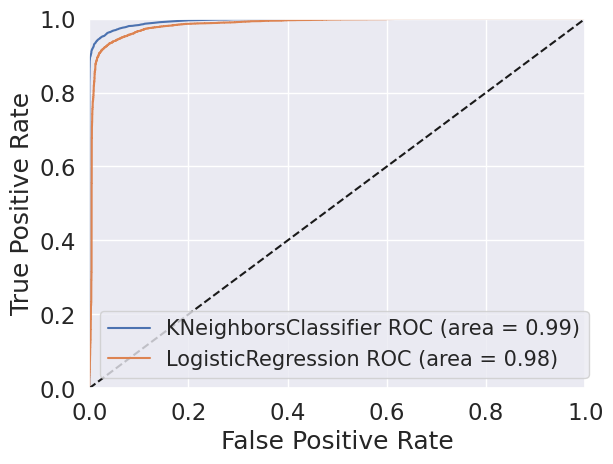

In [109]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
kfold = KFold(n_splits=7)
result = {}

trn_train, trn_test, trg_train, trg_test = train_test_split(x, y, test_size=0.25)

knn = KNeighborsClassifier(n_neighbors=200)
log_reg = LogisticRegression(penalty='l2', tol=0.001)
scores_knn = []
scores_log_reg = []

knn_result = knn.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, knn_result[:, 1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))

logreg_result = log_reg.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, logreg_result[:, 1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')

## Regression Models

This model below is built with the objective of predicting the average avocado price in the Northeast region in a certain year. We chose to isolate our data to the Northeast region specifically because there is high observable variation between the multiple sub regions of this dataset. So, pricing must be handled on a regional basis in order to formulate accurate predictions. We chose the Northeast region specifically as that is where all of our group members are from so the conlcusions drawn from this model will be pertinent to us as well.

First, lets prepare our data for regression:

In [110]:
northeast_df = act[act['broad_region'] == 'Northeast']

northeast_df['Date'] = pd.to_datetime(northeast_df['Date'])

northeast_df['Year'] = northeast_df['Date'].dt.year
northeast_df['Month'] = northeast_df['Date'].dt.month
northeast_df['YearMonth'] = northeast_df['Date'].dt.to_period('M').dt.to_timestamp()

average_prices_per_month = northeast_df.groupby('YearMonth')['AveragePrice'].mean().reset_index()

Lets take a look at the subsection of our dataset that we are working with:

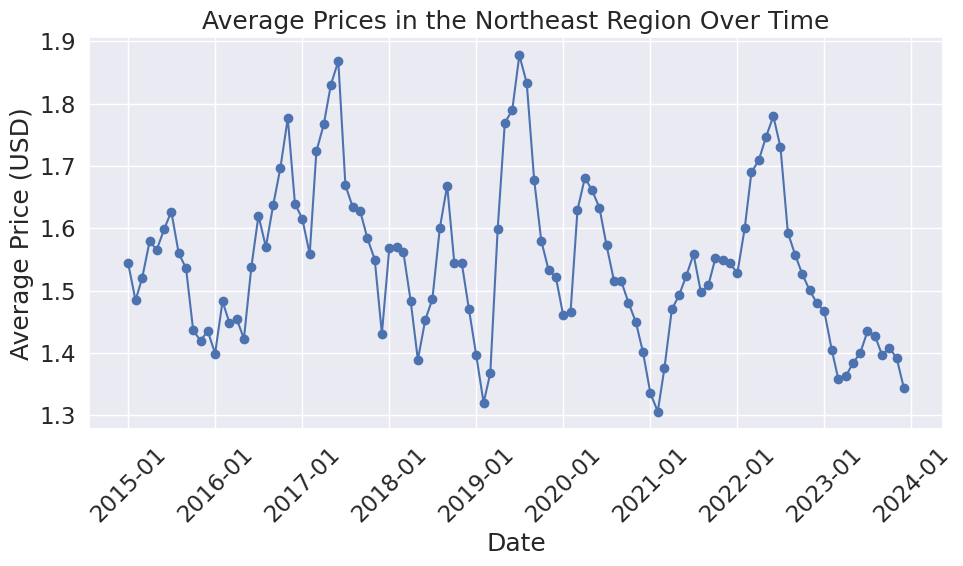

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(average_prices_per_month['YearMonth'], average_prices_per_month['AveragePrice'], marker='o', linestyle='-')
plt.title('Average Prices in the Northeast Region Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.grid(True)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()

To find the most suitable form of regression to run on this data, we can apply a process of trial and error.

Lets evaulate the applicability of trigonometric regression as the data seems most suitable for this type of trend:

Root Mean Squared Error: 0.12591659744833084


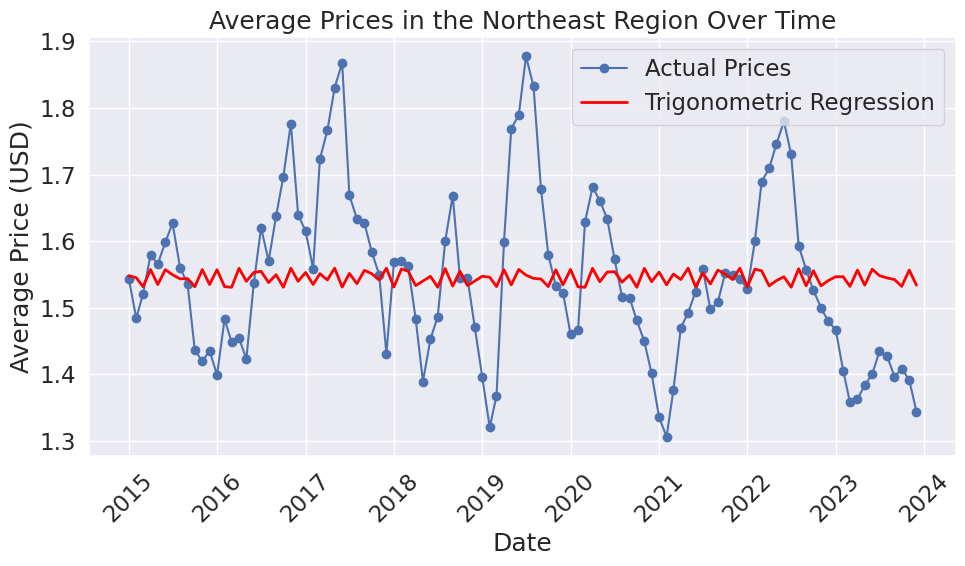

In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

average_prices_per_month['YearMonth'] = pd.to_datetime(average_prices_per_month['YearMonth'], origin='unix', unit='ns')

X = average_prices_per_month['YearMonth'].values.astype(np.int64).reshape(-1, 1)
Y = average_prices_per_month['AveragePrice'].values
X_trig = np.concatenate([np.sin(X), np.cos(X)], axis=1)

model = LinearRegression()
model.fit(X_trig, Y)

Y_pred = model.predict(X_trig)
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(10, 6))
plt.plot(average_prices_per_month['YearMonth'], average_prices_per_month['AveragePrice'], marker='o', linestyle='-', label='Actual Prices')
plt.plot(average_prices_per_month['YearMonth'], Y_pred, color='red', linestyle='-', linewidth=2, label='Trigonometric Regression')
plt.title('Average Prices in the Northeast Region Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Woah! Trig regression doesnt seem to be the best fit for our data.

Next: Polynomial regression:

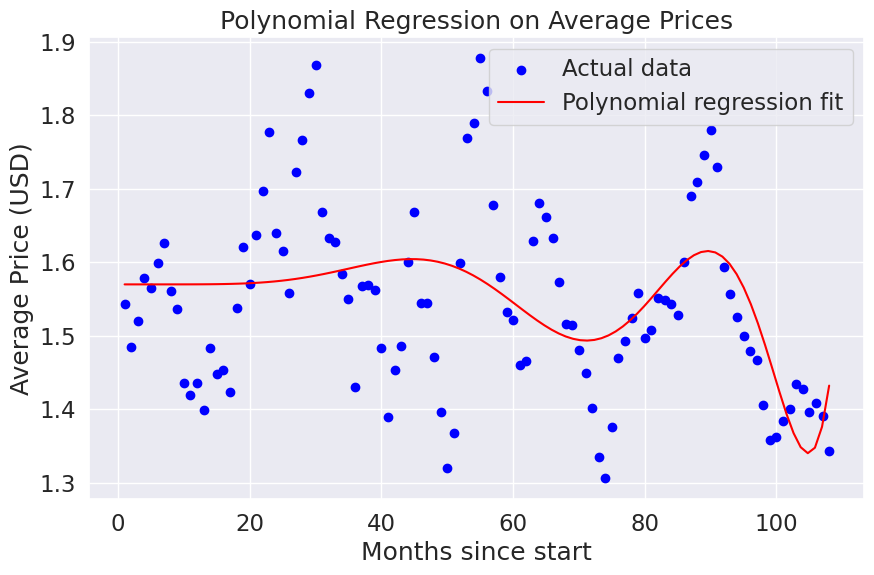

Train Mean Squared Error: 0.014200780177445057
Test Mean Squared Error: 0.006027609789226837
Train R-squared: 0.22830007418827492
Test R-squared: -0.02213141360866988


In [113]:
from sklearn.metrics import mean_squared_error, r2_score

average_prices_per_month['MonthIndex'] = (average_prices_per_month['YearMonth'].dt.year - average_prices_per_month['YearMonth'].dt.year.min()) * 12 + average_prices_per_month['YearMonth'].dt.month

X = average_prices_per_month[['MonthIndex']]
y = average_prices_per_month['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=12)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

X_plot = np.linspace(X['MonthIndex'].min(), X['MonthIndex'].max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X['MonthIndex'], y, color='blue', label='Actual data')
plt.plot(X_plot, y_plot, color='red', label='Polynomial regression fit')
plt.title('Polynomial Regression on Average Prices')
plt.xlabel('Months since start')
plt.ylabel('Average Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

From the visualization for avocados in the Northeast region, it is blantly clear that our data does not follow this polynomial trend. From the MSE and R^2 values calculated, we can see that overfitting is likely occuring.

So, in order to fit a better regression model and rid the issue of overfitting, we will use ridge regularization:

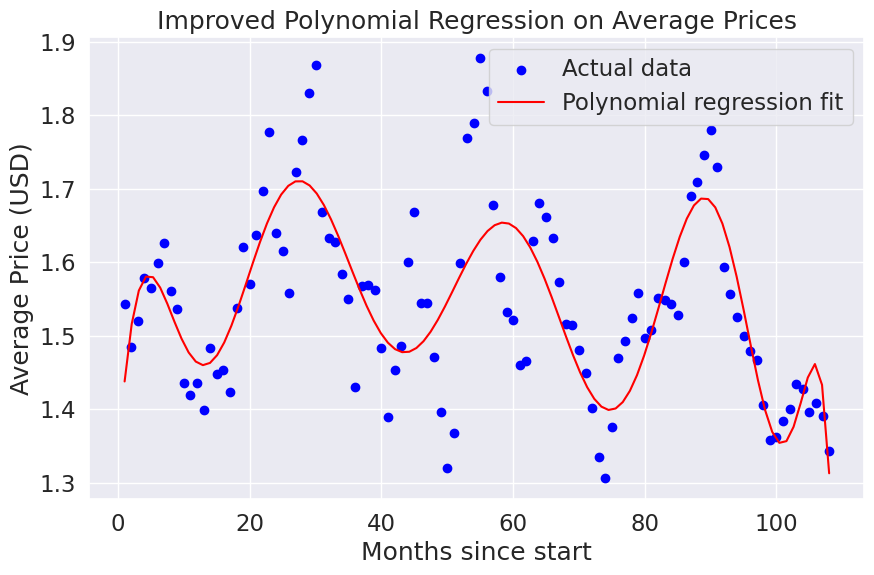

Train Mean Squared Error: 0.007925969796504529
Test Mean Squared Error: 0.0021992597509266527
Train R-squared: 0.5692863189542754
Test R-squared: 0.627060716152355


In [114]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = average_prices_per_month[['MonthIndex']]
y = average_prices_per_month['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(PolynomialFeatures(degree=12), Ridge(alpha=0.5))
model.fit(X_train, y_train)

X_plot = np.linspace(X['MonthIndex'].min(), X['MonthIndex'].max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X['MonthIndex'], y, color='blue', label='Actual data')
plt.plot(X_plot, y_plot, color='red', label='Polynomial regression fit')
plt.title('Improved Polynomial Regression on Average Prices')
plt.xlabel('Months since start')
plt.ylabel('Average Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Yay! As we can see, visually the line of best fit created from running ridge regularization fits our data better. Plus, now, both the calculated MSE and R^2 values for this model are better as well. We have a low MSE value and a higher r^2 value closer to 1.

The best regression model that serves our dataset the best can be concluded to be ridge regularization. The line of best fit from this model can be used to predict future avocado prices.

# Insights and Conclusion

There is more to avocado prices in America than what meets the eye. The consumption and price points of these products are dependent are a variety of intersectional relationships between location, type, season, etc. Gaining an in-depth understanding of the interactions between these factors is crucial for stakeholders and consumers in this top grossing industry.


Using the different tests, we were able to see that avocado prices continue to increase rapidly and consumption increases as well. Although there is no significant correlaiton between the two, it is clear that avocados will continue to be bought and consumed with no decline on the horizon.

With avocados being important for consumers and businesses, there could be drastic effects if this increase continues. Small businesses like family owned restaurants who use avocados as a main menu item will either need to budget more to afford avocados or lower the amount of avocado based products they provide to customers. General consumers of avocados also may not be able to afford avocados anymore if the trend continues of price increase.

Being able to make educated decisions when managing, producing, or even buying avocados starts with the leveraging of these relationships to one's advantage. Through multiple data analyses techniques, we aimed to do exactly that in this report. We not only observed trends viewable in the given dataset and drew conclusions on pricing/classification but also extrapolated this information to make informed predictions about possible future trends outside of the given data.  

***We can only hope that the avo-pocalypse is not upon us.***
